In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets

Quiz 5

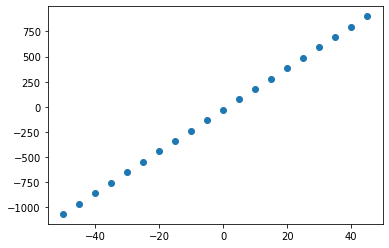

In [3]:
income_model = lambda t : 20.67449411*t - 30.12047857
t = np.arange(-50, 50, 5)

plt.scatter(t, income_model(t))
plt.show()

In [4]:
print("When the temperature is around 20 degrees, the income is: ",
      round(income_model(20), 2))

When the temperature is around 20 degrees, the income is:  383.37


Increasing temperature increases ice cream sales.

In [5]:
print("The income (in dollars) that the current model predict when the temperature is 1.2 degrees:", 
      round(income_model(1.2), 2))

The income (in dollars) that the current model predict when the temperature is 1.2 degrees: -5.31


In [6]:
boston_url = "http://lib.stat.cmu.edu/datasets/boston"
column_names1 = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO"]
column_names2 = [ "B", "LSTAT", "MEDV"]
boston_data1 = pd.read_csv(boston_url,
                          header=None,
                          skiprows=lambda x: x%2 == 1 if x >= 22 else True,
                          delimiter=r"\s+", 
                          names=column_names1)
                  #.reset_index(drop=True)
boston_data2 = pd.read_csv(boston_url,
                          header=None,
                          skiprows=lambda x: x%2 == 0 if x >= 23 else True, 
                          delimiter=r"\s+", 
                          names=column_names2) 
boston_data = pd.concat([boston_data1, boston_data2], axis = 1)
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [7]:
data = datasets.load_boston()
#print(data.DESCR)

# data frame with the features
# the predictors / independent variables
df = pd.DataFrame(data.data, columns = data.feature_names)

# the target - housing value -> MEDV - Median value of owner-occupied homes in $1000's
# the dependent variable that we are trying to predict/estimate
target = pd.DataFrame(data.target, columns=["MEDV"])

In [8]:
X = df
y = target["MEDV"]
regression = LinearRegression().fit(X, y)
#reg.score(X, y)
print("The coefficient related to the number of rooms:", round(regression.coef_[5], 2))

The coefficient related to the number of rooms: 3.81


In [9]:
X_zeros = np.zeros(len(X.columns)).reshape(1, -1)
predicted_price = regression.predict(X_zeros)
print("The price of a hypothetical house with all variables set to zero is:", 
      round(predicted_price[0], 2))

The price of a hypothetical house with all variables set to zero is: 36.46


In [10]:
# model evaluation - for the whole model
# (no splitting into train and test data...)

print("R^2 score of our linear regression model is:", round(regression.score(X, y), 2))

R^2 score of our linear regression model is: 0.74
